# Taller 2 punto 2

## Importando librerias

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance

## 2.1.

### Selecting Dataset
 - Body Fat Prediction Dataset

In [22]:
df=pd.read_csv("bodyfat.csv")
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### Chosing 4 continous variables

In [23]:
df=df[["BodyFat","Weight","Height","Abdomen"]]
df.head()

,BodyFat,Weight,Height,Abdomen
0,12.3,154.25,67.75,85.2
1,6.1,173.25,72.25,83.0
2,25.3,154.00,66.25,87.9
3,10.4,184.75,72.25,86.4
4,28.7,184.25,71.25,100.0


In [4]:
#Exploring filtered dataset
df.describe()

,BodyFat,Weight,Height,Abdomen
count,252.000000,252.000000,252.000000,252.000000
mean,19.150794,178.924405,70.148810,92.555952
std,8.368740,29.389160,3.662856,10.783077
min,0.000000,118.500000,29.500000,69.400000
25%,12.475000,159.000000,68.250000,84.575000
50%,19.200000,176.500000,70.000000,90.950000
75%,25.300000,197.000000,72.250000,99.325000
max,47.500000,363.150000,77.750000,148.100000


### Calculating means vector

In [5]:
variable_means=df.mean()
variable_means

BodyFat     19.150794
Weight     178.924405
Height      70.148810
Abdomen     92.555952
dtype: float64

### Calculating Covariance Matrix

In [6]:
covariance_matrix_df = df.cov()
covariance_matrix_df

# Convert the DataFrame to a numpy array
covariance_matrix = np.matrix(covariance_matrix_df.to_numpy())
covariance_matrix

matrix([[ 70.0358161 , 150.62337697,  -2.74334566,  73.40475621],
        [150.62337697, 863.72271877,  33.1856467 , 281.41054141],
        [ -2.74334566,  33.1856467 ,  13.41651252,   3.46833381],
        [ 73.40475621, 281.41054141,   3.46833381, 116.2747453 ]])

### Calculating Inverse of Covariance Matrix

In [7]:
I_covariance_matrix=covariance_matrix.I
I_covariance_matrix

matrix([[ 0.05119364,  0.00669411,  0.00650316, -0.04871398],
        [ 0.00669411,  0.00820238, -0.01279405, -0.02369597],
        [ 0.00650316, -0.01279405,  0.10134889,  0.02383584],
        [-0.04871398, -0.02369597,  0.02383584,  0.09599214]])

### Creating a pairplot for each couple of variables with the mean

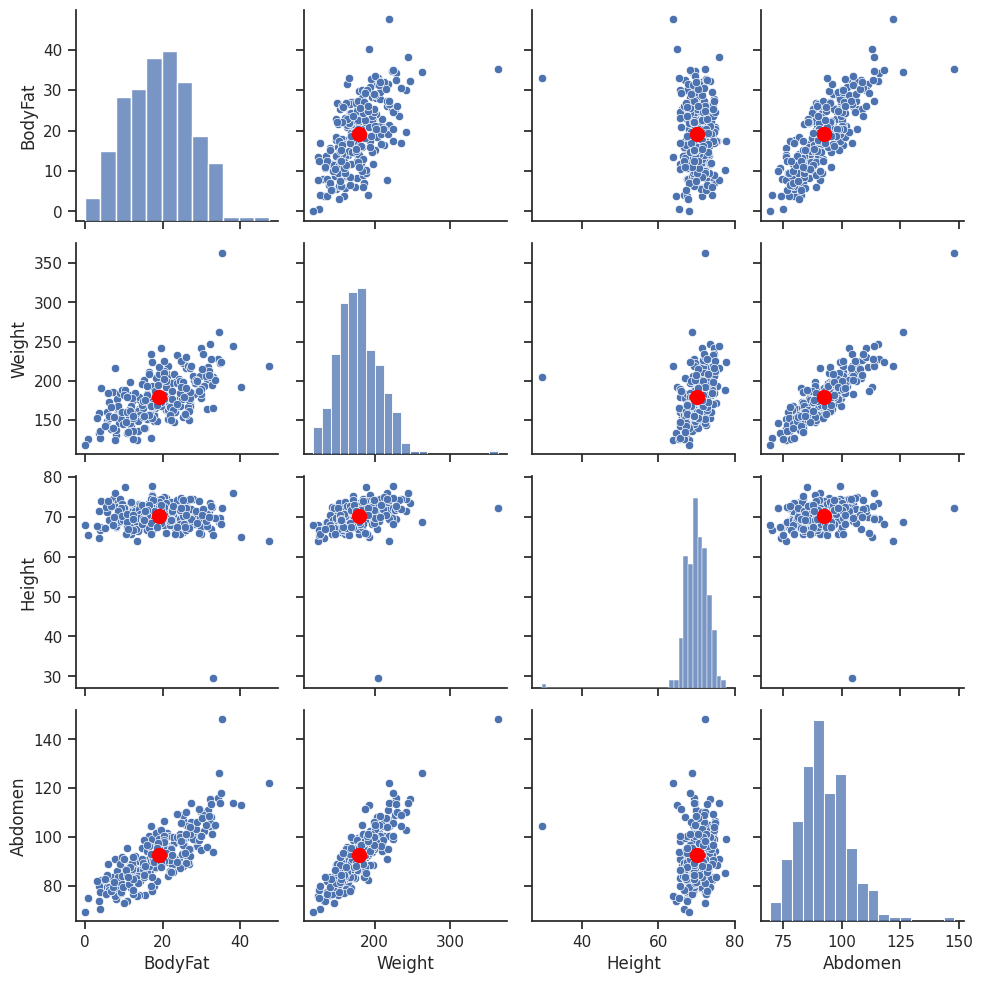

In [12]:

# Create a pair plot for all variables
#plt.figure(figsize=(10,10))
sns.set(style="ticks")
g = sns.pairplot(df)

# Add points representing means of each variable pair
for i, ax_row in enumerate(g.axes):
    for j, ax in enumerate(ax_row):
        if i != j:
            ax.scatter(variable_means.iloc[j], variable_means.iloc[i], color='red', marker='o', s=100)

        
plt.show()

## 2.2. Recentering Data

In [8]:
z = df - variable_means
z

,BodyFat,Weight,Height,Abdomen
0,-6.850794,-24.674405,-2.39881,-7.355952
1,-13.050794,-5.674405,2.10119,-9.555952
2,6.149206,-24.924405,-3.89881,-4.655952
3,-8.750794,5.825595,2.10119,-6.155952
4,9.549206,5.325595,1.10119,7.444048
...,...,...,...,...
247,-8.150794,-44.674405,-3.14881,-8.955952
248,14.449206,22.075595,-0.39881,12.444048
249,10.149206,7.825595,-4.14881,18.944048
250,6.849206,11.825595,0.35119,8.744048


In [9]:
zT = z.T
zT

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
BodyFat,-6.850794,-13.050794,6.149206,-8.750794,9.549206,1.749206,0.049206,-6.750794,-15.050794,-7.450794,...,11.249206,13.449206,9.849206,-3.950794,11.049206,-8.150794,14.449206,10.149206,6.849206,12.749206
Weight,-24.674405,-5.674405,-24.924405,5.825595,5.325595,31.325595,2.075595,-2.924405,12.075595,19.325595,...,55.325595,48.825595,20.575595,-23.424405,36.575595,-44.674405,22.075595,7.825595,11.825595,28.575595
Height,-2.398810,2.101190,-3.898810,2.101190,1.101190,4.601190,-0.398810,2.351190,3.851190,3.351190,...,1.851190,2.601190,-1.648810,-0.898810,0.351190,-3.148810,-0.398810,-4.148810,0.351190,-0.148810
Abdomen,-7.355952,-9.555952,-4.655952,-6.155952,7.444048,1.844048,-1.855952,-4.055952,-10.055952,-3.955952,...,16.444048,20.844048,13.544048,-8.255952,15.044048,-8.955952,12.444048,18.944048,8.744048,15.944048


In [10]:
z@zT

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
0,715.623947,294.673629,616.469373,-43.550676,-254.225141,-809.525974,-36.942214,142.601576,-130.115409,-404.742780,...,-1567.594407,-1456.447819,-670.839635,667.935782,-1089.682611,1231.586704,-734.271857,-392.021331,-403.875260,-909.354674
1,294.673629,298.253312,97.479056,144.389006,-223.665458,-208.536292,4.477468,148.396258,232.089274,32.421903,...,-613.999724,-646.298137,-378.184952,261.485464,-494.767928,438.841387,-433.592174,-366.606649,-239.310577,-481.209992
2,616.469373,97.479056,695.917300,-178.540250,-112.969714,-796.540547,-41.234288,41.094502,-361.722482,-522.142353,...,-1393.563980,-1241.437393,-508.901708,601.488708,-915.094684,1117.337131,-517.753930,-204.665905,-294.709833,-707.486748
3,-43.550676,144.389006,-178.540250,152.824701,-96.049764,165.499403,22.248163,71.946953,272.049968,209.177597,...,126.525970,43.897558,-53.164258,-52.953841,24.512766,-140.412919,-75.281480,-168.560954,-44.134883,-43.559297
4,-254.225141,-223.665458,-112.969714,-96.049764,176.175772,202.324939,-2.731301,-107.642512,-150.029496,6.013133,...,526.511506,546.483093,302.636278,-224.923305,412.673302,-385.887383,347.739056,275.044581,193.860653,392.451238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1231.586704,438.841387,1117.337131,-140.412919,-385.887383,-1444.713216,-75.249456,214.591833,-338.860151,-777.752522,...,-2716.429149,-2485.745061,-1115.589377,1155.443540,-1859.892353,2152.361962,-1214.179099,-588.926073,-663.545002,-1522.839417
248,-734.271857,-433.592174,-517.753930,-75.281480,347.739056,737.918222,23.594482,-213.511728,-77.568712,268.401417,...,1587.779790,1530.531377,765.732062,-676.572522,1154.149085,-1214.179099,851.124839,556.797865,468.693937,1013.507022
249,-392.021331,-366.606649,-204.665905,-168.560954,275.044581,278.738748,-16.762492,-177.991202,-264.733186,-13.230557,...,850.962816,902.666903,524.397587,-376.079496,681.904611,-588.926073,556.797865,540.335891,326.246962,655.677548
250,-403.875260,-239.310577,-294.709833,-44.134883,193.860653,400.164820,8.513579,-115.460131,-46.862115,144.090514,...,875.743887,852.682974,428.628659,-376.573424,639.875683,-663.545002,468.693937,326.246962,263.338034,564.608619


## 2.3. Malhalanobis Distance - Pairplot of variables

### Malhalanobis distance

We can calculate this distance using `scipy.spatial.distance.malhalanobis`. The details of the distance and the parameters of the functions were finded here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.mahalanobis.html

![Alt text](image.png)

In [24]:
# Calcular el vector de medias
means_vector = df.mean().values
means_vector

array([ 19.15079365, 178.92440476,  70.14880952,  92.55595238])

In [25]:
cov_matrix = df.cov()

In [11]:
I_covariance_matrix

matrix([[ 0.05119364,  0.00669411,  0.00650316, -0.04871398],
        [ 0.00669411,  0.00820238, -0.01279405, -0.02369597],
        [ 0.00650316, -0.01279405,  0.10134889,  0.02383584],
        [-0.04871398, -0.02369597,  0.02383584,  0.09599214]])

In [26]:
# Calcular la distancia de Mahalanobis para cada observación
mahalanobis_distances = []
for _, row in df.iterrows():
    observation = row.values
    mahalanobis_distance = distance.mahalanobis(observation, means_vector, np.linalg.inv(cov_matrix))
    mahalanobis_distances.append(mahalanobis_distance)

# Agregar las distancias de Mahalanobis al DataFrame
df['Mahalanobis Distance'] = mahalanobis_distances

In [27]:
df

,BodyFat,Weight,Height,Abdomen,Mahalanobis Distance
0,12.3,154.25,67.75,85.2,1.210689
1,6.1,173.25,72.25,83.0,1.859856
2,25.3,154.00,66.25,87.9,1.989363
3,10.4,184.75,72.25,86.4,1.698064
4,28.7,184.25,71.25,100.0,1.611502
...,...,...,...,...,...
247,11.0,134.25,67.00,83.6,2.314263
248,33.6,201.00,69.75,105.0,1.792601
249,29.3,186.75,66.00,111.5,3.716335
250,26.0,190.75,70.50,101.3,1.149306


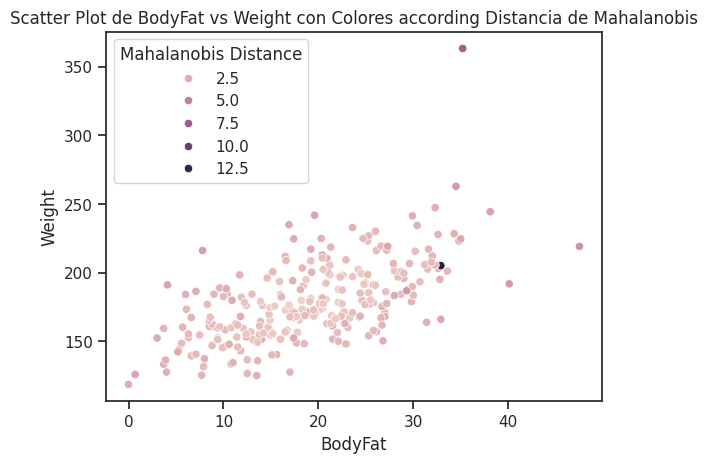

In [28]:
# Crear una gráfica de dispersión de dos variables, coloreando por distancia de Mahalanobis
sns.scatterplot(x='BodyFat', y='Weight', hue='Mahalanobis Distance', data=df)
plt.xlabel('BodyFat')
plt.ylabel('Weight')
plt.title('Scatter Plot de BodyFat vs Weight con Colores according Distancia de Mahalanobis')
plt.show()